In [1]:
n_cores = -1

In [2]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [20,5]

In [3]:
import readfile 
import extract 

In [4]:
from sklearn.neighbors.kde import KernelDensity

In [5]:
filename = "orig/data/inga_compounds_and_unpd_in_silico.mgf"
outfile = "inga_out"
printSZ = 10000
arrLines = readfile.readFile(filename)

In [6]:
print("  File '{0}' contains {1} lines".format(filename,len(arrLines)))

  File 'orig/data/inga_compounds_and_unpd_in_silico.mgf' contains 6429034 lines


In [7]:
pb = extract.ParseBlocks()
mass, name, massabund, blockind = pb.parseArrLines(arrLines, printSZ)

      Treating Block Id         0
      Treating Block Id     10000
      Treating Block Id     20000
      Treating Block Id     30000
      Treating Block Id     40000
      Treating Block Id     50000
      Treating Block Id     60000
      Treating Block Id     70000
      Treating Block Id     80000
      Treating Block Id     90000
      Treating Block Id    100000
      Treating Block Id    110000
      Treating Block Id    120000
      Treating Block Id    130000
      Treating Block Id    140000
      Treating Block Id    150000
      Treating Block Id    160000
      Treating Block Id    170000
      Treating Block Id    180000
      Treating Block Id    190000
      Treating Block Id    200000
      Treating Block Id    210000
      Treating Block Id    220000


In [8]:
print("  Summary::")
print("    #El in Pep Mass Array:{0}".format(mass.shape[0]))
print("    #El in Ion Array:{0}".format(name.shape[0]))
print("    Dim Mass Abundance Vector:{0}".format(massabund.shape))
print("    Dim Mass BlockID Vector:{0}".format(blockind.shape))

  Summary::
    #El in Pep Mass Array:220989
    #El in Ion Array:220989
    Dim Mass Abundance Vector:(5324089, 2)
    Dim Mass BlockID Vector:(5324089,)


In [9]:
mass

array([ 552.293448,  338.046024,  724.221464, ...,  328.072907,
        262.19328 ,  636.278192])

In [10]:
name

array(['UNPD98266', 'UNPD207163', 'UNPD3499', ..., 'UNPD98267',
       'UNPD47332', 'UNPD101003'], dtype=object)

In [11]:
massabund

array([[  41.00329 ,    1.688456],
       [  43.01894 ,    2.135631],
       [  55.01894 ,    1.105409],
       ..., 
       [ 549.23414 ,   24.377134],
       [ 551.24979 ,   22.666363],
       [ 591.2447  ,    5.496205]])

In [12]:
blockind

array([     0,      0,      0, ..., 220988, 220988, 220988], dtype=uint32)

### Value Distribution

In [13]:
mz = massabund[:,0]
mz.shape

(5324089,)

In [14]:
mz_min = mz.min()
mz_max = mz.max()
mz_min, mz_max

(15.02402, 3117.2858500000002)

In [15]:
kde = KernelDensity(kernel='tophat', bandwidth=0.001).fit(mz.reshape(-1,1))

In [16]:
x = np.arange(0, 3200, 0.1)
x

array([  0.00000000e+00,   1.00000000e-01,   2.00000000e-01, ...,
         3.19970000e+03,   3.19980000e+03,   3.19990000e+03])

In [17]:
dens = kde.score_samples(x.reshape(-1,1))
dens

array([-inf, -inf, -inf, ..., -inf, -inf, -inf])

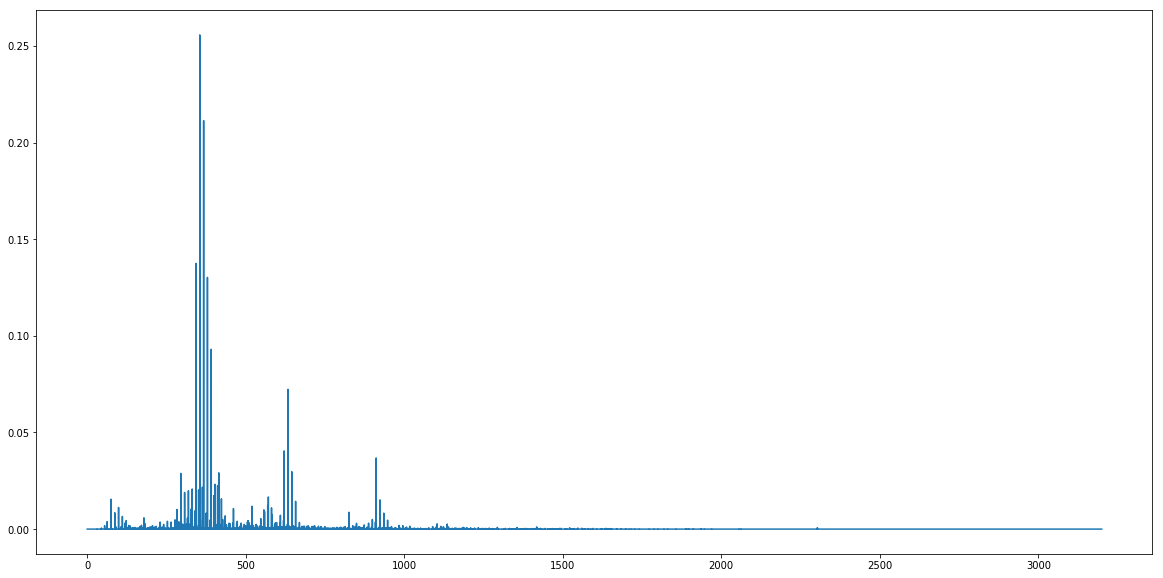

In [18]:
plt.figure(figsize=(20,10))
plt.plot(x, np.exp(dens), '-')
plt.show()

### Save data to file

In [19]:
np.savez('inga_out.npz', mass, name, massabund, blockind)

### Splitting simulated data and real data

In [19]:
name

array(['UNPD98266', 'UNPD207163', 'UNPD3499', ..., 'UNPD98267',
       'UNPD47332', 'UNPD101003'], dtype=object)

In [20]:
namestr = name.astype('U')
namestr

array(['UNPD98266', 'UNPD207163', 'UNPD3499', ..., 'UNPD98267',
       'UNPD47332', 'UNPD101003'],
      dtype='<U18')

In [63]:
ind = np.chararray.startswith(namestr, 'UNPD')
ind.shape

(220989,)

In [76]:
mass_silico = mass[ind]
mass_silico.shape

(217698,)

In [77]:
mass_real = mass[~ind]
mass_real.shape

(3291,)

In [78]:
name_silico = name[ind]
name_silico.shape

(217698,)

In [80]:
name_real = name[~ind]
name_real.shape

(3291,)

In [61]:
silicoInd = np.where(ind==1)[0]
silicoInd.shape

(217698,)

In [60]:
realInd = np.where(ind==0)[0]
realInd.shape

(3291,)

In [50]:
isSilico = np.isin(blockind, silicoInd)
isSilico.shape

(5324089,)

In [51]:
isReal = np.isin(blockind, realInd)
isReal.shape

(5324089,)

In [67]:
massabund_silico = massabund[isSilico,:]
massabund_silico.shape

(5270581, 2)

In [68]:
massabund_real = massabund[isReal,:]
massabund_real.shape

(53508, 2)

In [87]:
blockind_silico = blockind[isSilico]
blockind_silico.shape

(5270581,)

In [88]:
blockind_real = blockind[isReal]
blockind_real.shape

(53508,)

### Save data to file

In [89]:
np.savez('inga_out_silico.npz', mass_silico, name_silico, massabund_silico, blockind_silico)

In [90]:
np.savez('inga_out_real.npz', mass_real, name_real, massabund_real, blockind_real)